In [1]:
from pycigar.utils.input_parser import input_parser
from pycigar.utils.registry import register_devcon
from pycigar.controllers.regulator_attack_controller import RegulatorAttackController

register_devcon('regulator_attack_controller', RegulatorAttackController)
misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/breakpoints.csv'

start = 100
percentage_hack = 0.45
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=percentage_hack)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] = 'regulator_attack_controller'
    node['devices'][0]['hack'] = [100, percentage_hack, 600]

from pycigar.envs import MultiAttackCentralControlPhaseSpecificPVInverterEnv

env = MultiAttackCentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)
env.reset()
done = False
while not done:
    _, r, done, _ = env.step([10, 10, 10])

In [2]:
from pycigar.utils.logging import logger
import numpy as np   
import matplotlib.pyplot as plt
log_dict = logger().log_dict
custom_metrics = logger().custom_metrics

No handles with labels found to put in legend.


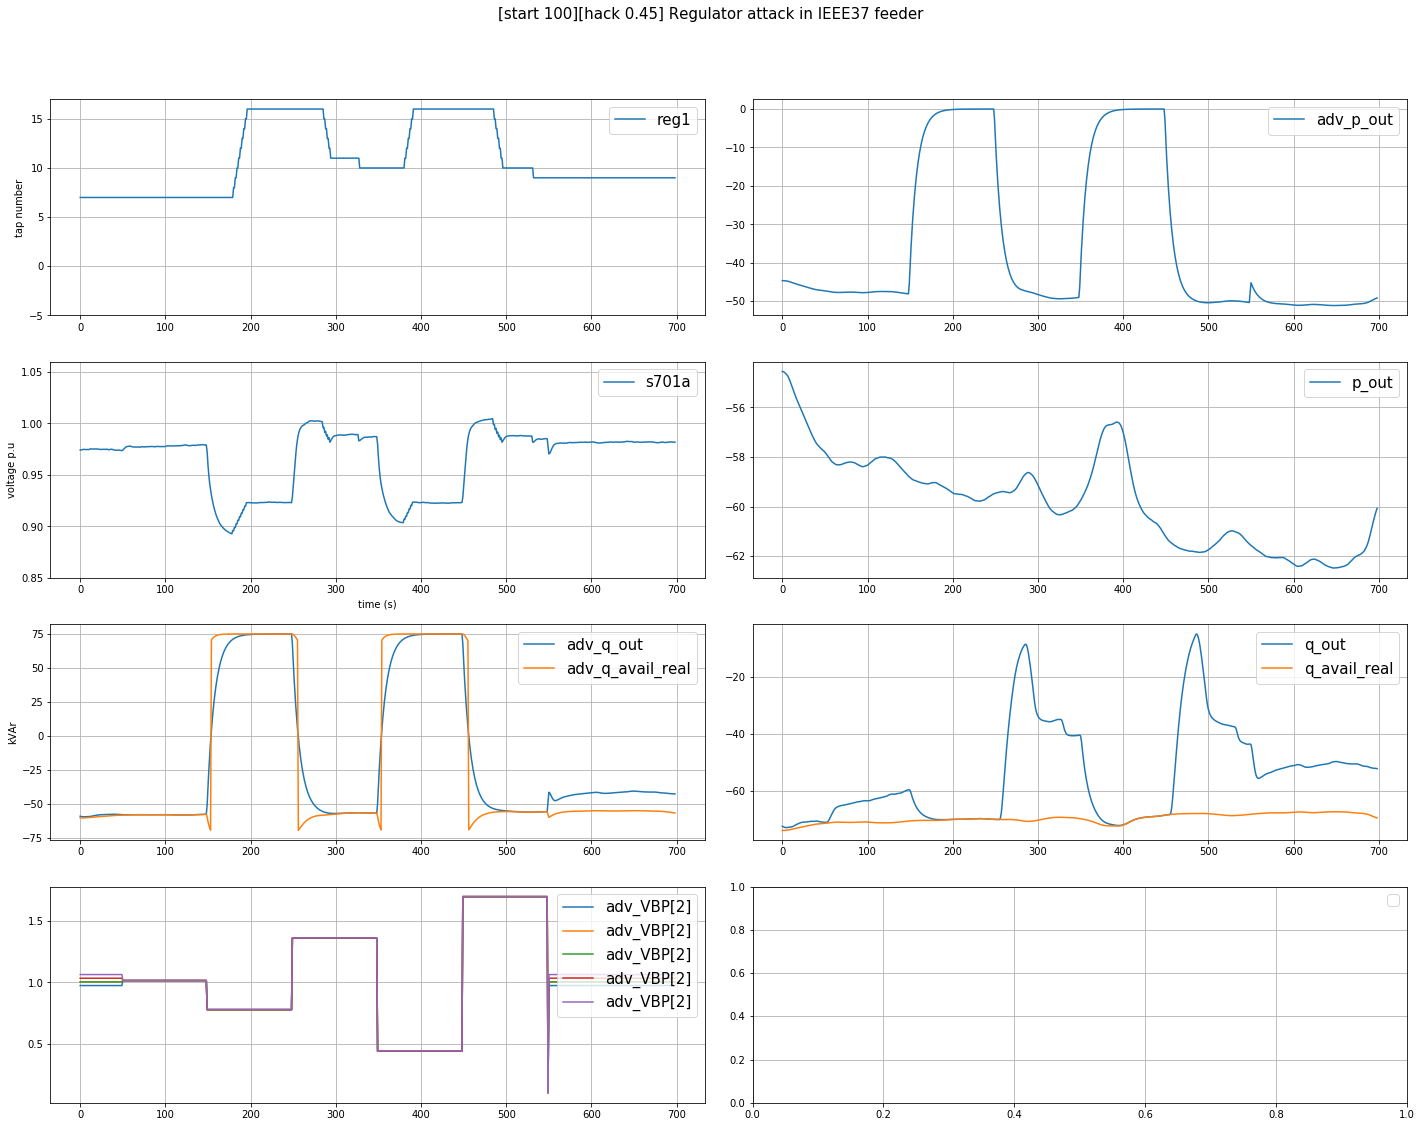

In [3]:
f, ax = plt.subplots(4, 2, figsize=(20, 16))
plt.rc('font', size=15)
plt.rc('figure', titlesize=15)
f.suptitle('[start {}][hack {}] Regulator attack in IEEE37 feeder'.format(start, percentage_hack))
ax[0, 0].plot(logger().log_dict['reg1']['tap_number'], label='reg1')
ax[1, 0].plot(logger().log_dict['s701a']['voltage'], label='s701a')

ax[1, 0].set_xlabel('time (s)')
ax[0, 0].set_ylabel('tap number')
ax[1, 0].set_ylabel('voltage p.u')
ax[2, 0].set_ylabel('kVAr')

ax[0, 0].set_ylim([-5, 17])
ax[1, 0].set_ylim([0.85, 1.06])
#ax[2, 0].set_ylim([-5000, 3000])

ax[2, 0].plot(log_dict['adversary_inverter_s701a']['q_out'], label='adv_q_out')
ax[2, 0].plot(log_dict['adversary_inverter_s701a']['q_avail_real'], label='adv_q_avail_real')

ax[2, 1].plot(log_dict['inverter_s701a']['q_out'], label='q_out')
ax[2, 1].plot(log_dict['inverter_s701a']['q_avail_real'], label='q_avail_real')

ax[0, 1].plot(log_dict['adversary_inverter_s701a']['p_out'], label='adv_p_out')
#ax[0, 1].plot(log_dict['adversary_inverter_s701a']['q_avail_real'], label='adv_q_avail_real')

ax[1, 1].plot(log_dict['inverter_s701a']['p_out'], label='p_out')
#ax[1, 1].plot(log_dict['inverter_s701a']['q_avail_real'], label='q_avail_real')

ax[3, 0].plot(np.array(log_dict['adversary_inverter_s701a']['control_setting']), label='adv_VBP[2]')
#ax[3, 0].plot(np.array(log_dict['inverter_s701a']['control_setting']), label='VBP[2]')

"""q_out = np.zeros(len(log_dict['inverter_s701a']['q_out']))
q_avail_real = np.zeros(len(log_dict['inverter_s701a']['q_avail_real']))

for k in log_dict.keys():
    if 'inverter_' in k:
        q_out += np.array(log_dict[k]['q_out'])
        q_avail_real += np.array(log_dict[k]['q_avail_real'])
        q_set += np.array(log_dict[k]['q_set'])


ax[2].plot(q_out, label='q_out')
ax[2].plot(q_avail_real, label='q_avail_real')"""


for a in ax:
    for r in a:
        r.grid(b=True, which='both')
        r.legend(loc=1, ncol=1)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

In [4]:
for k in log_dict.keys():
    if 'inverter_' in k:
        print(k, end=' ')

inverter_s701a adversary_inverter_s701a inverter_s701b adversary_inverter_s701b inverter_s701c adversary_inverter_s701c inverter_s712c adversary_inverter_s712c inverter_s713c adversary_inverter_s713c inverter_s714a adversary_inverter_s714a inverter_s714b adversary_inverter_s714b inverter_s718a adversary_inverter_s718a inverter_s720c adversary_inverter_s720c inverter_s722b adversary_inverter_s722b inverter_s722c adversary_inverter_s722c inverter_s724b adversary_inverter_s724b inverter_s725b adversary_inverter_s725b inverter_s727c adversary_inverter_s727c inverter_s728 adversary_inverter_s728 inverter_s729a adversary_inverter_s729a inverter_s730c adversary_inverter_s730c inverter_s731b adversary_inverter_s731b inverter_s732c adversary_inverter_s732c inverter_s733a adversary_inverter_s733a inverter_s734c adversary_inverter_s734c inverter_s735c adversary_inverter_s735c inverter_s736b adversary_inverter_s736b inverter_s737a adversary_inverter_s737a inverter_s738a adversary_inverter_s738a in

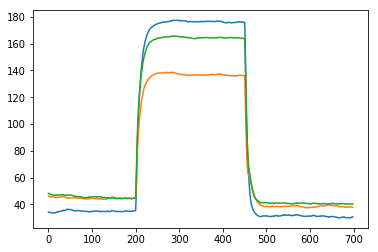

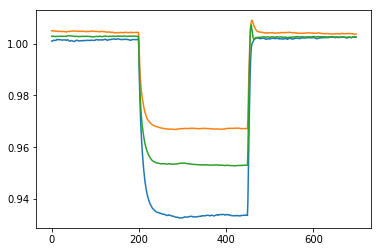

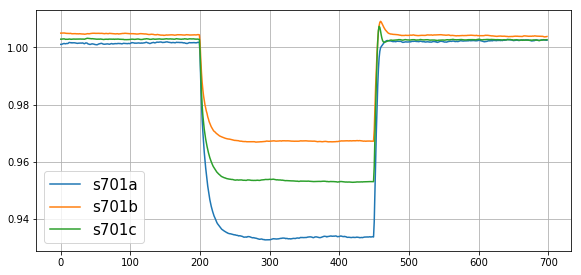

In [3]:
import numpy as np   
import matplotlib.pyplot as plt

plt.plot(logger().log_dict['current']['l1'])
plt.show()
plt.plot(logger().log_dict['s701a']['voltage'])
plt.plot(logger().log_dict['s701b']['voltage'])
plt.plot(logger().log_dict['s701c']['voltage'])


f, ax = plt.subplots(figsize=(25/3, 4))
plt.rc('font', size=15)
plt.rc('figure', titlesize=70)
plt.plot(logger().log_dict['s701a']['voltage'], label='s701a')
plt.plot(logger().log_dict['s701b']['voltage'], label='s701b')
plt.plot(logger().log_dict['s701c']['voltage'], label='s701c')
ax.grid(b=True, which='both')
ax.legend(loc=3, ncol=1)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [4]:
logger().log_dict.keys()

dict_keys(['u_metrics', 'v_metrics', 'y_metrics', 'component_observation', 'current', 'inverter_s701a', 'adversary_inverter_s701a', 'inverter_s701b', 'adversary_inverter_s701b', 'inverter_s701c', 'adversary_inverter_s701c', 'inverter_s712c', 'adversary_inverter_s712c', 'inverter_s713c', 'adversary_inverter_s713c', 'inverter_s714a', 'adversary_inverter_s714a', 'inverter_s714b', 'adversary_inverter_s714b', 'inverter_s718a', 'adversary_inverter_s718a', 'inverter_s720c', 'adversary_inverter_s720c', 'inverter_s722b', 'adversary_inverter_s722b', 'inverter_s722c', 'adversary_inverter_s722c', 'inverter_s724b', 'adversary_inverter_s724b', 'inverter_s725b', 'adversary_inverter_s725b', 'inverter_s727c', 'adversary_inverter_s727c', 'inverter_s728', 'adversary_inverter_s728', 'inverter_s729a', 'adversary_inverter_s729a', 'inverter_s730c', 'adversary_inverter_s730c', 'inverter_s731b', 'adversary_inverter_s731b', 'inverter_s732c', 'adversary_inverter_s732c', 'inverter_s733a', 'adversary_inverter_s733

In [5]:
import pickle

with open('current_oscillation_scaling_1.pickle', 'rb') as handle:
    col = pickle.load(handle)
with open('current_unbalance_scaling_1.pickle', 'rb') as handle:
    cul = pickle.load(handle)

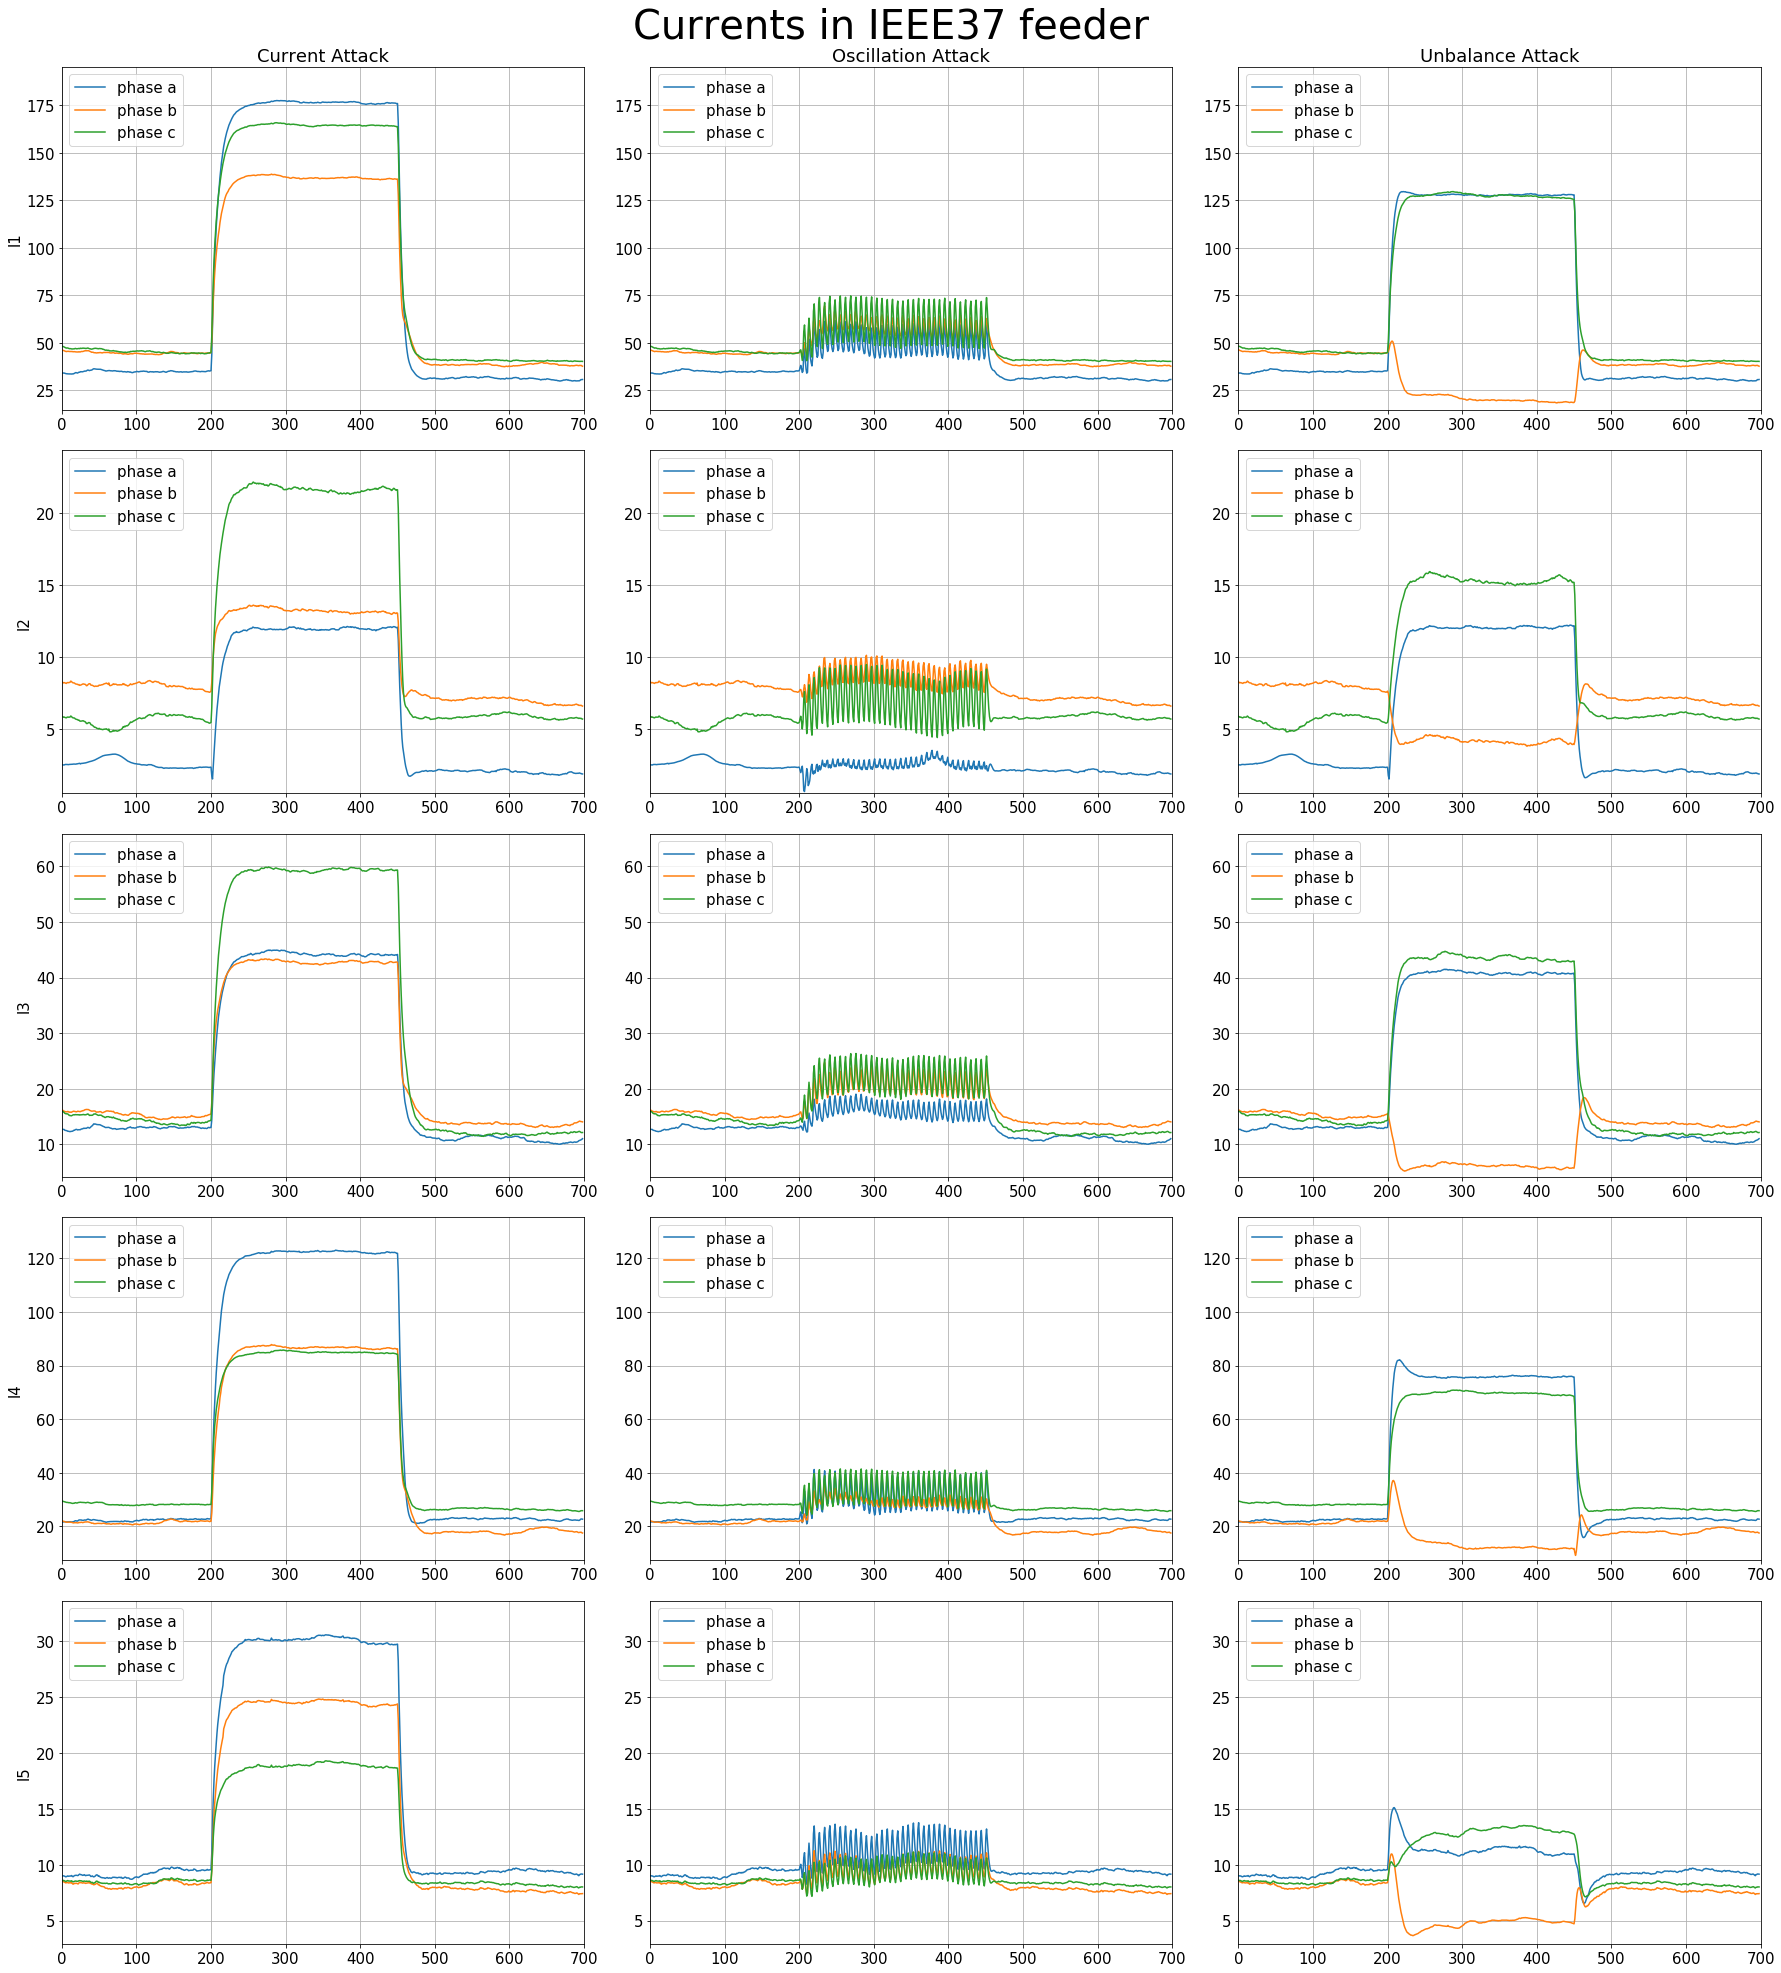

In [18]:
import random

co = logger().log_dict['current']

co_new = {}
for i in range(5):
    co_new[list(co.keys())[i]] = co[list(co.keys())[i]]
#co_new = dict(random.sample(co.items(), 5))
f, ax = plt.subplots(len(co_new.keys()), 3, figsize=(25, 8 + 4*len(co_new.keys())))
plt.rc('font', size=15)
plt.rc('figure', titlesize=40)
f.suptitle('Currents in IEEE37 feeder')

ax[0, 0].set_title('Current Attack')
ax[0, 1].set_title('Oscillation Attack')
ax[0, 2].set_title('Unbalance Attack')


for idx, line in enumerate(co_new):
    if line != 'jumper':
        coi = np.array(co[line])
        coli = np.array(col[line])
        culi = np.array(cul[line])
        
        max_y = np.max(coi) + 0.1*np.max(coi)
        min_y = np.min([np.min(coi), np.min(coli), np.min(culi)]) - 0.2*np.min([np.min(coi), np.min(coli), np.min(culi)])
        max_x = 700
        min_x = 0

        ax[idx, 0].plot(coi[:, 0], label='phase a')
        ax[idx, 0].plot(coi[:, 1], label='phase b')
        ax[idx, 0].plot(coi[:, 2], label='phase c')
        ax[idx, 0].grid(b=True, which='both')
        ax[idx, 0].legend(loc=2, ncol=1)
        
        ax[idx, 1].plot(coli[:, 0], label='phase a')
        ax[idx, 1].plot(coli[:, 1], label='phase b')
        ax[idx, 1].plot(coli[:, 2], label='phase c')
        ax[idx, 1].grid(b=True, which='both')
        ax[idx, 1].legend(loc=2, ncol=1)

        ax[idx, 2].plot(culi[:, 0], label='phase a')
        ax[idx, 2].plot(culi[:, 1], label='phase b')
        ax[idx, 2].plot(culi[:, 2], label='phase c')
        ax[idx, 2].grid(b=True, which='both')
        ax[idx, 2].legend(loc=2, ncol=1)

        ax[idx, 0].set_ylabel(line)
        ax[idx, 0].set_ylim([min_y, max_y])
        ax[idx, 1].set_ylim([min_y, max_y])
        ax[idx, 2].set_ylim([min_y, max_y])
        
        ax[idx, 0].set_xlim([min_x, max_x])
        ax[idx, 1].set_xlim([min_x, max_x])
        ax[idx, 2].set_xlim([min_x, max_x])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()